# Introducción a la Programación en JULIA 
## Notebook 5

Mauricio Tejada

ILADES - Universidad Alberto Hurtado

## Contenidos

- [Importando y Exportando Datos](#5.-Importando-y-Exportando-Datos)
    - [Importando Archivos de Texto Delimitados](#5.1-Archivos-de-Texto-Delimitados)
    - [Importando Datos en Formato Excel](#5.2-Importando-Datos-en-Formato-Excel)
    - [Formato Julia Data](#5.3-Formato-Julia-Data-JLD)

## 5. Importando y Exportando Datos

Mientras trabajamos en Julia, todo el espacio de trabajo se encuentra guardado en la memoria RAM del computador. Al cerrar el programa toda la memoria es liberada y la información eliminada. Julia puede cargar datos en su espacio de trabajo a partir de datos externos así como y guardar objetos de su espacio en diversos formatos. 

### 5.1 Archivos de Texto Delimitados

En muchos contextos los datos se encuentran disponibles en archivos con formato texto (txt, csv, etc) y la columnas están delimitadas por algún delimitador particular (coma, punto y coma, TAB, etc). El paquete **DelimitedFiles** permite cargar la información contenida en estos archivos así como guardar información en los mismos. La sintaxis es:

- `variable = readdlm("nombre_archivo.txt", '\t')` por ejemplo carga el objeto y lo guarda en el espacio de trabajo como `variable` (el delimitador es TAB `\t`).

Tomemos como ejemplo los datos del PIB de Chile contenidos en el archivos *PIBChile.csv*. La primera columna contiene los años (1960-2015) y la segunda el PIB. Ambas columnas están separadas por una coma.

In [17]:
using DelimitedFiles

In [18]:
datos2 = readdlm("PIBChile.csv", ',')

57×2 Array{Any,2}:
     "Periodo"           "PIB Real"
 1960            13326609
 1961            14015469
 1962            14612686
 1963            15495153
 1964            15868596
 1965            16032079
 1966            17792727
 1967            18438409
 1968            19108994
 1969            19900155
 1970            20287272
 1971            22189810
    ⋮           
 2004            76987661
 2005            81742969
 2006            86397688
 2007            90856522
 2008            93847932
 2009            92875262
 2010            98219034
 2011           103954673
 2012           109627615
 2013           113987063
 2014           116125911
 2015           118525235

Existen situaciones en que es útil guardar la información en archivos de texto (`txt`). La sintaxis es:

- `writedlm("nombre_archivo.txt",variable)` guarda el objeto `variable`.

A modelo de ejemplo vamos a crear una matriz de tamaño $100 \times 5$ con números aleatorios extraídos de una distribución normal con media 100 y varianza 25) y los guardaremos en formato txt. Por defecto `writedlm()`utiliza TAB como separador:

In [19]:
datos = 10*ones(100,5) + 5*randn(100,5);
writedlm("miarchivo.txt", datos)

Leyendo el archivo recientemente guardado y almacenando la información en la matriz `datos2` tenemos:

In [20]:
datos2 = readdlm("miarchivo.txt", '\t')

100×5 Array{Float64,2}:
 15.9262     6.42332  10.5837     15.1296     5.75697
 19.4131    10.9842    9.56502     6.53916   10.1808
  3.81677    3.03576  20.3266     10.5157     9.67852
 16.1318    10.3835    6.29103     7.1447    11.8354
  6.81193    8.19104   5.83568    14.692     11.9172
  3.47878   10.9517    1.71248     6.71301    9.6183
 13.1965     3.1818   -0.0847388  13.6835    14.8666
  7.94302   14.9213    8.60798     9.66335   14.8204
 14.6398    13.3014    8.54054    17.0184    13.3489
 10.8597     8.00575   9.15683    13.5952    -0.92534
  3.3127     8.014     6.8505     11.6466     9.45148
 11.0541    13.7041   13.6276     13.819     11.9089
 13.3033     4.79259   6.90874     9.01035   14.6479
  ⋮                                          
 -0.370425   7.35507  13.2897      0.173577  10.2334
  3.23284    6.48324  11.072       8.02813    4.74298
 11.0756     8.52184   5.59204    16.7411     8.56644
  6.54847   13.1891    9.71936     8.6866    15.9566
  6.70397    5.15456   

### 5.2 Importando Datos en Formato Excel 

Julia también es capaz de leer datos desde Excel usando el paquete **ExcelReaders**. La sintaxis es: 

- `variable = readxl("nombre_archivo.xls", "nombre_hoja!rango")` carga el la información contenida en el archivo nombre_archivo.xls (en la hoja `nombre_hoja` y en el rango `rango`) y la guarda en el espacio de trabajo como `variable`.

Por ejemplo, importemos nuevamente la información del PIB de Chile pero ahora de una hoja Excel.

In [21]:
using ExcelReaders
using Statistics
using Plots

In [22]:
# Nos aseguramos de estar en el directorio de trabajo correcto.
cd("/Users/mauriciotejada/Dropbox/Teaching/MAE - Julia/2020/slides/") 

In [23]:
datos = readxl("PIBChile.xlsx", "Datos!A2:B57")

56×2 Array{Any,2}:
 1960.0  1.33266e7
 1961.0  1.40155e7
 1962.0  1.46127e7
 1963.0  1.54952e7
 1964.0  1.58686e7
 1965.0  1.60321e7
 1966.0  1.77927e7
 1967.0  1.84384e7
 1968.0  1.9109e7
 1969.0  1.99002e7
 1970.0  2.02873e7
 1971.0  2.21898e7
 1972.0  2.19179e7
    ⋮    
 2004.0  7.69877e7
 2005.0  8.1743e7
 2006.0  8.63977e7
 2007.0  9.08565e7
 2008.0  9.38479e7
 2009.0  9.28753e7
 2010.0  9.8219e7
 2011.0  1.03955e8
 2012.0  1.09628e8
 2013.0  1.13987e8
 2014.0  1.16126e8
 2015.0  1.18525e8

Ahora podemos trabajar con los datos. Por ejemplo grafiquemos el PIB en niveles y en crecimientos:

In [24]:
tiempo = datos[:,1]
pib    = datos[:,2];

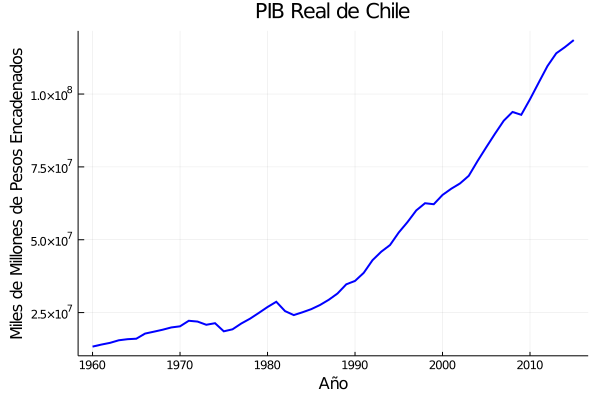

In [25]:
plt_pib = plot(tiempo,pib, xlabel="Año", ylabel="Miles de Millones de Pesos Encadenados", title = "PIB Real de Chile", 
               color="blue", legend=false, linewidth = 2, grid = true)
display(plt_pib)

Ahora computemos la tasa de crecimiento:

In [26]:
T = length(pib)
g = ((pib[2:T,1] - pib[1:T-1,1])./pib[1:T-1,1])*100;

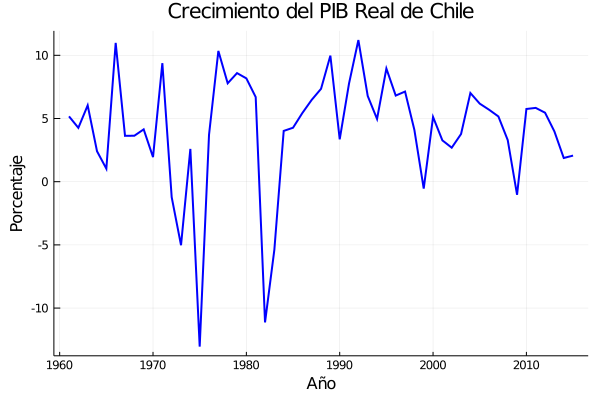

In [27]:
plt_gpib = plot(tiempo[2:T],g, xlabel="Año", ylabel="Porcentaje", 
                title = "Crecimiento del PIB Real de Chile", color="blue", legend=false, 
                linewidth = 2, grid = true)
display(plt_gpib)

Crecimiento promedio entre 1960 y 2015:

In [28]:
crecprom = mean(g)

4.161620220853264

### 5.3 Formato Julia Data JLD

En algunos contextos es útil guardar varias piezas de información (objetos) del espacio de trabajo. Guardar cada uno en un archivo de texto puede ser problemático cuando tenemos muchos objetos a guardar (1 objeto, 1 archivo de texto). El paquete **JLD** permite guardar múltiples objetos en un solo archivo (`.jld` o Julia Data) y lo hace siguiendo la misma lógica de un Diccionario (guardando el par: clave - objeto). La sintaxis es:

- `save("nombre_archivo.jld", "clave1", objeto1, "clave2", objeto2, ...)`

Un archivo `jdl`puede ser cargado a memoria usando la sintaxis:

- `variable = load("nombre_archivo.jld")`

En este caso `variable` es un Diccionario.

In [29]:
using JLD

Como ejemplo, creamos dos objeto: un entero `t` y un vector `z` y lo guardamos en `miarchivo.jld`:  

In [30]:
t = 15
z = [1,3]
save("miarchivo.jld", "t", t, "z", z)

In [31]:
d = load("miarchivo.jld")

Dict{String,Any} with 2 entries:
  "t" => 15
  "z" => [1, 3]

In [32]:
# Recuperamos el objeto original
z = d["z"]

2-element Array{Int64,1}:
 1
 3